# Dragon Real State Price Predictor

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv(r"data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [15]:
data['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [17]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

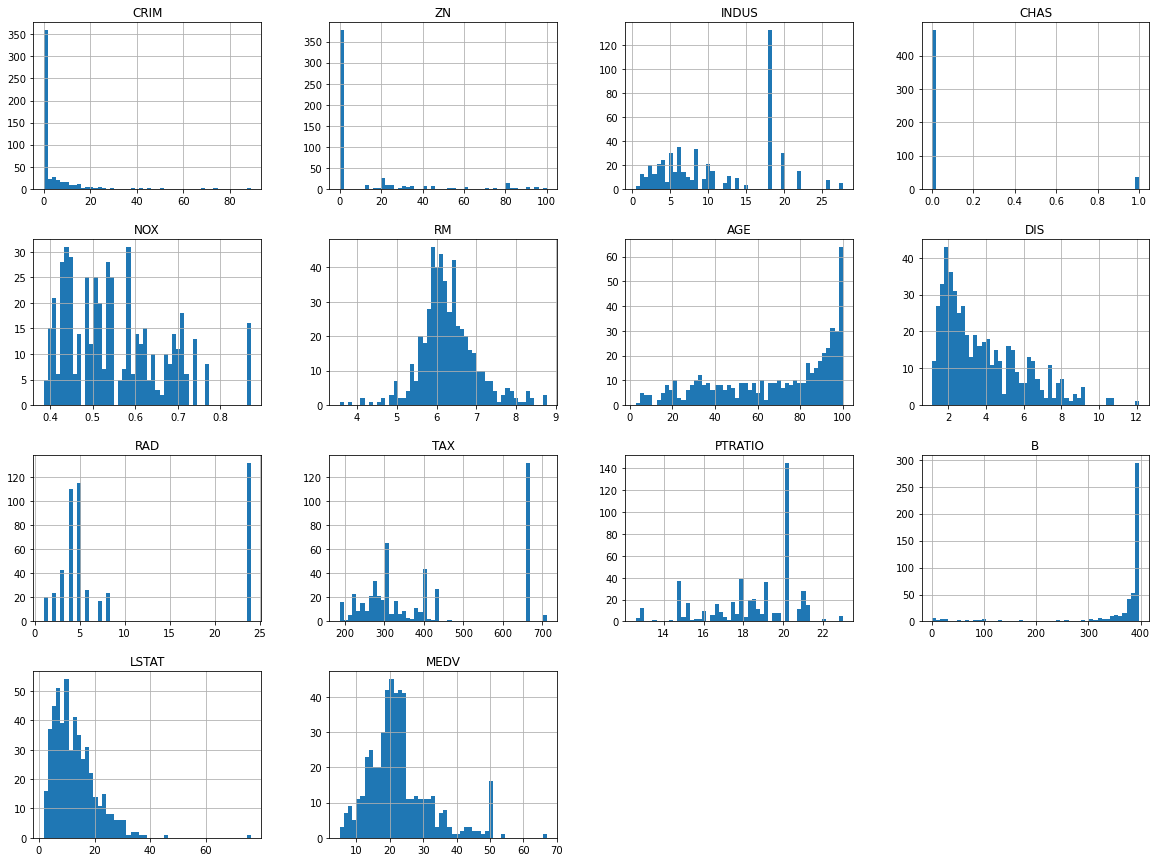

In [18]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
#Train Test Spliting

SyntaxError: invalid syntax (Temp/ipykernel_24848/4110493887.py, line 1)

In [20]:
import numpy as np
# for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(data, 0.2)

[124  84 433 255  68 173 284 400 153 155 148 472  70 460 399  78 342  55
  73 176 274 414  30 423 323   9 452  93 181 505 167 386 265 453  63 154
 496 281  77 485 172 117 227 426 476 341 132 409   2 340 410 180 375  79
 490 450 249 509 104 498 218 286  33 365 479  72   0  11 302  22 101  82
 131  76 502 311  18 465 137 253 415  39 461  46 280 425 405  90 317 316
 238 298 475  69 247 299 370 506 494 483 275 454 324 208 204 301 390 416
 248 140 331 272 441 354  86 185  75 448  15 355 351 394  19 329 442  56
 245 501 447 338 432 210  25 488  42 244 310 336 126 333  31 113 397 486
 250  57 203  24  17 418  66 220 307  94 481 209  23 234 266 211   5 116
  45 182  16 473 364   3 320 194  60 110 325 268  29 195 262  26   7 469
 108  37 157 477 118 114 175 271 192 144 377 388 228 462 229 455 141 373
  67 222 168 504 384 322 193  81 109 446 145  92 152 231 334  83 103 165
 163 199 508  74 449 225 480 119 287 305 381 361 408 237 261 277 391 403
  36 196 139 495 360 290 291  59 111  89 417   6 36

In [22]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 409
Rows in test set: 102



In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
len(train_set)
len(test_set)

103

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(data, data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 212 to 49
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     103 non-null    float64
 1   ZN       103 non-null    float64
 2   INDUS    103 non-null    float64
 3   CHAS     103 non-null    int64  
 4   NOX      103 non-null    float64
 5   RM       103 non-null    float64
 6   AGE      103 non-null    float64
 7   DIS      103 non-null    float64
 8   RAD      103 non-null    int64  
 9   TAX      103 non-null    int64  
 10  PTRATIO  103 non-null    float64
 11  B        103 non-null    float64
 12  LSTAT    103 non-null    float64
 13  MEDV     103 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.1 KB


In [25]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [26]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

In [27]:
data = strat_train_set.copy()

In [28]:
#Ccorrelation

In [29]:
corr_matrix = data.corr()

In [30]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

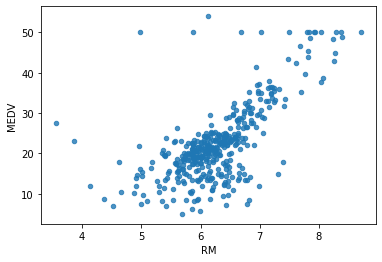

In [31]:
from pandas.plotting import scatter_matrix
attributes = ['MDEV', 'RM', 'ZN', 'LSTAT']
attributes
#['MDEV', 'RM', 'ZN', 'LSTAT']
data.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [32]:
Atributes combination

SyntaxError: invalid syntax (Temp/ipykernel_24848/659107148.py, line 1)

In [33]:
data['TAXRM'] = data['TAX']/data['RM']
data['TAXRM']

495     68.959436
254     51.571709
365    187.026116
193     38.970588
35            NaN
          ...    
386    143.164230
243     46.926326
22      49.983719
480    106.696572
455    102.068966
Name: TAXRM, Length: 408, dtype: float64

In [34]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1,68.959436
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9,NaN


In [35]:
corr_matrix = data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
TAXRM     -0.535069
LSTAT     -0.720350
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

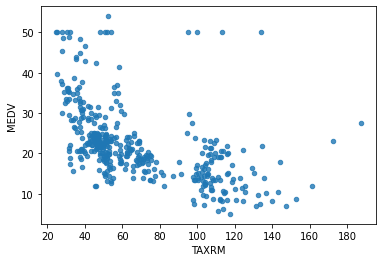

In [36]:
data.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [37]:
data = strat_train_set.drop("MEDV", axis=1)
data_labels = strat_train_set["MEDV"].copy()

In [38]:
#MIssing Attributes

In [39]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)
# data.dropna(subset=['RM'])       # Option 1
# data.drop("RM", axis=1)    # Option 2
# median = data["RM"].median()           #compute median for option 3
# median
# data["RM"].fillna(median)           #option 3
median = data["RM"].median()  
data["RM"].fillna(median)   

495    5.670
254    6.108
365    3.561
193    6.800
35     6.208
       ...  
386    4.652
243    6.393
22     6.142
480    6.242
455    6.525
Name: RM, Length: 408, dtype: float64

In [58]:
# from sklean.impute import SimpleIMputer
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer      
imputer = SimpleImputer(strategy = "median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [59]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [60]:
x = imputer.transform(data)
data_tr = pd.DataFrame(x, columns=data.columns)
data_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716458,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


In [61]:
#Scikit-learn Design
#Feature Scaling
#Creating Pipeline

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
data_num_tr = my_pipeline.fit_transform(data)
data_num_tr
data_num_tr.shape

(408, 13)

In [71]:
#Selecting a desired model for Dragon Estates

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_num_tr,data_labels)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
pred = my_pipeline.transform(some_data)
model.predict(pred)
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

In [73]:
#Evaluating the model

In [74]:
from sklearn.metrics import mean_squared_error
data_predictions = model.predict(data_num_tr)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)

In [75]:
lin_mse

25.653747676684862

In [83]:
#DesicionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(data_num_tr,data_labels)

DecisionTreeRegressor()

In [84]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
pred = my_pipeline.transform(some_data)
model.predict(pred)
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

In [85]:
from sklearn.metrics import mean_squared_error
data_predictions = model.predict(data_num_tr)
mse = mean_squared_error(data_labels, data_predictions)
rmse = np.sqrt(lin_mse)

In [86]:
mse

0.0

In [87]:
#Using better evaluation technique - Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data_num_tr, data_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores 

array([4.59320814, 3.94068831, 4.73456414, 5.2260604 , 4.75674104,
       2.80261202, 6.94054893, 4.0612986 , 3.61379302, 3.52593959])

In [89]:
def print_scores(Scores):
    print("Scores", scores)
    print("mean", scores.mean())
    print("Standard deviation:", score.std())
print(rmse_scores)

[4.59320814 3.94068831 4.73456414 5.2260604  4.75674104 2.80261202
 6.94054893 4.0612986  3.61379302 3.52593959]
